In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score , classification_report

In [2]:
df = pd.read_csv('hotel_booking.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [5]:
def missing_percent(df):
    nan_percent = (df.isnull().sum()/len(df))*100
    nan_percent = nan_percent[nan_percent > 0].sort_values()
    return nan_percent
missing_percent(df)

children     0.003350
country      0.408744
agent       13.686238
company     94.306893
dtype: float64

In [6]:
#replace true if NA(not a number) otherwise false

In [7]:
df[df['children'].isna()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
40600,City Hotel,1,2,2015,August,32,3,1,0,2,...,Transient-Party,12.0,0,1,Canceled,2015-08-01,Craig Campos,CraigCampos@mail.com,820-622-9854,************7219
40667,City Hotel,1,1,2015,August,32,5,0,2,2,...,Transient-Party,12.0,0,1,Canceled,2015-08-04,David Murphy,David.Murphy94@yahoo.com,231-438-6733,************8925
40679,City Hotel,1,1,2015,August,32,5,0,2,3,...,Transient-Party,18.0,0,2,Canceled,2015-08-04,Frank Burton,Frank.Burton@comcast.net,395-084-3601,************6190
41160,City Hotel,1,8,2015,August,33,13,2,5,2,...,Transient-Party,76.5,0,1,Canceled,2015-08-09,Jerry Roberts,JRoberts@hotmail.com,979-355-3554,************5648


In [8]:
filter = (df.adults == 0) & (df.children == 0) & (df.babies == 0)
df[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,Transient-Party,0.00,0,0,Check-Out,2015-10-06,Colleen Hernandez,Colleen.H25@yandex.com,863-349-5397,************8042
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,Transient,0.00,0,0,Check-Out,2015-10-12,Mark Martinez,Martinez.Mark@yahoo.com,969-893-1222,************9670
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,Transient-Party,0.00,0,0,Check-Out,2015-11-23,Carrie Carney,CarrieCarney@yandex.com,944-344-7905,************8964
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,Transient-Party,0.00,0,0,Check-Out,2016-01-04,Summer Stewart,Stewart_Summer84@aol.com,125-574-6642,************1069
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,Transient-Party,0.00,0,0,Check-Out,2016-01-05,Brian Buchanan,Brian.B@yahoo.com,946-176-5726,************9836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,Transient,100.80,0,0,Check-Out,2017-06-30,Gregory Ashley,GregoryAshley51@outlook.com,784-717-9035,************9561
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,Transient,0.00,1,1,Check-Out,2017-07-01,Christina Mcdonald,Mcdonald.Christina@protonmail.com,487-056-2442,************8308
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,Transient,73.80,0,0,Check-Out,2017-07-17,Megan Johnson,MJohnson@protonmail.com,501-374-4690,************3910
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,Transient-Party,22.86,0,1,Check-Out,2017-07-22,Alexandra Riley,Alexandra.Riley55@mail.com,318-771-9720,************6778


In [9]:
df = df[~filter]
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.00,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860


In [10]:
filter2 = (df.reservation_status == 'Canceled') & (df.is_canceled == 0)
df[filter2]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card


In [11]:
missing_percent(df)

children     0.003355
country      0.400973
agent       13.656572
company     94.322624
dtype: float64

In [12]:
df[df['children'].isna()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
40600,City Hotel,1,2,2015,August,32,3,1,0,2,...,Transient-Party,12.0,0,1,Canceled,2015-08-01,Craig Campos,CraigCampos@mail.com,820-622-9854,************7219
40667,City Hotel,1,1,2015,August,32,5,0,2,2,...,Transient-Party,12.0,0,1,Canceled,2015-08-04,David Murphy,David.Murphy94@yahoo.com,231-438-6733,************8925
40679,City Hotel,1,1,2015,August,32,5,0,2,3,...,Transient-Party,18.0,0,2,Canceled,2015-08-04,Frank Burton,Frank.Burton@comcast.net,395-084-3601,************6190
41160,City Hotel,1,8,2015,August,33,13,2,5,2,...,Transient-Party,76.5,0,1,Canceled,2015-08-09,Jerry Roberts,JRoberts@hotmail.com,979-355-3554,************5648


In [13]:
from sklearn.impute import KNNImputer


knn_imputer = KNNImputer(n_neighbors=5)
imputed = knn_imputer.fit_transform(df[['children','agent']].values)
df[['children','agent']] = imputed

In [14]:
df['country'].fillna(df['country'].mode()[0], inplace=True)

In [15]:
missing_percent(df)

company    94.322624
dtype: float64

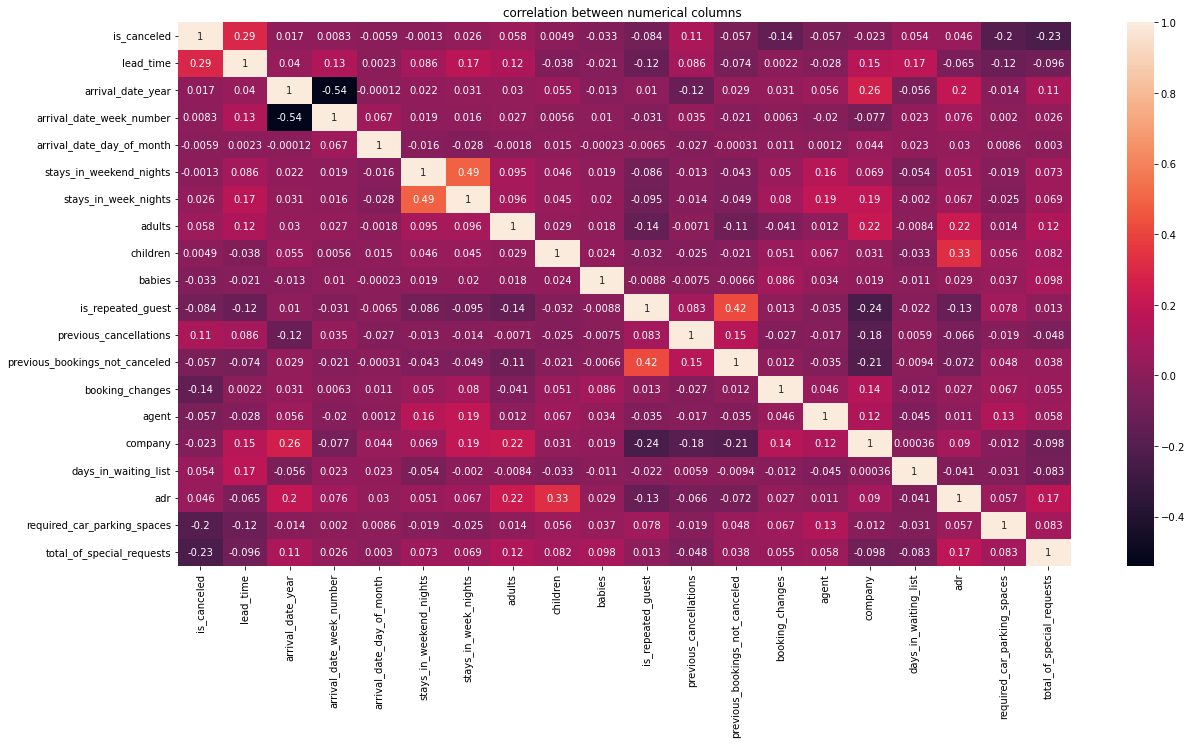

In [16]:
plt.figure(figsize = (20 , 10))
sns.heatmap(df.corr(), annot = True )
plt.title('correlation between numerical columns ')
plt.show()

In [17]:
df.corr()['is_canceled'].abs().sort_values(ascending = False)

is_canceled                       1.000000
lead_time                         0.292876
total_of_special_requests         0.234877
required_car_parking_spaces       0.195701
booking_changes                   0.144832
previous_cancellations            0.110139
is_repeated_guest                 0.083745
adults                            0.058182
previous_bookings_not_canceled    0.057365
agent                             0.056826
days_in_waiting_list              0.054301
adr                               0.046492
babies                            0.032569
stays_in_week_nights              0.025542
company                           0.023439
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
arrival_date_day_of_month         0.005948
children                          0.004856
stays_in_weekend_nights           0.001323
Name: is_canceled, dtype: float64

In [18]:
useless_columns = ['credit_card' , 'phone-number' , 'email' , 'name' ,'company' , 'reservation_status'
                  ,'reservation_status_date']

df.drop(useless_columns , axis = 1 , inplace = True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119210 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119210 non-null  object 
 1   is_canceled                     119210 non-null  int64  
 2   lead_time                       119210 non-null  int64  
 3   arrival_date_year               119210 non-null  int64  
 4   arrival_date_month              119210 non-null  object 
 5   arrival_date_week_number        119210 non-null  int64  
 6   arrival_date_day_of_month       119210 non-null  int64  
 7   stays_in_weekend_nights         119210 non-null  int64  
 8   stays_in_week_nights            119210 non-null  int64  
 9   adults                          119210 non-null  int64  
 10  children                        119210 non-null  float64
 11  babies                          119210 non-null  int64  
 12  meal            

In [20]:
missing_percent(df)

Series([], dtype: float64)

In [21]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')

In [22]:
# Define the categorical features 

categorical_columns = [column for column in df.columns if df[column].dtype == 'object']
categorical_columns

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type']

In [23]:
df[categorical_columns].head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient


In [24]:
# printing unique values of each categorical columns
for column in categorical_columns:
    print(f"{column} : \n{df[column].unique()}\n")

hotel : 
['Resort Hotel' 'City Hotel']

arrival_date_month : 
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']

meal : 
['BB' 'FB' 'HB' 'SC' 'Undefined']

country : 
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV'
 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT'
 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN' 'SYC'
 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB' 'CMR'
 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI' 'SAU'
 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB' 'NPL'
 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA

In [25]:
#Encoding categorical columns
df= pd.get_dummies(df , columns = ['hotel','meal','market_segment','distribution_channel',
                                  'deposit_type','customer_type'])

In [26]:
df

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,342,2015,July,27,1,0,0,2,0.0,...,0,0,0,1,0,0,0,0,1,0
1,0,737,2015,July,27,1,0,0,2,0.0,...,0,0,0,1,0,0,0,0,1,0
2,0,7,2015,July,27,1,0,1,1,0.0,...,0,0,0,1,0,0,0,0,1,0
3,0,13,2015,July,27,1,0,1,1,0.0,...,0,0,0,1,0,0,0,0,1,0
4,0,14,2015,July,27,1,0,2,2,0.0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,August,35,30,2,5,2,0.0,...,0,1,0,1,0,0,0,0,1,0
119386,0,102,2017,August,35,31,2,5,3,0.0,...,0,1,0,1,0,0,0,0,1,0
119387,0,34,2017,August,35,31,2,5,2,0.0,...,0,1,0,1,0,0,0,0,1,0
119388,0,109,2017,August,35,31,2,5,2,0.0,...,0,1,0,1,0,0,0,0,1,0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119210 entries, 0 to 119389
Data columns (total 50 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119210 non-null  int64  
 1   lead_time                       119210 non-null  int64  
 2   arrival_date_year               119210 non-null  int64  
 3   arrival_date_month              119210 non-null  object 
 4   arrival_date_week_number        119210 non-null  int64  
 5   arrival_date_day_of_month       119210 non-null  int64  
 6   stays_in_weekend_nights         119210 non-null  int64  
 7   stays_in_week_nights            119210 non-null  int64  
 8   adults                          119210 non-null  int64  
 9   children                        119210 non-null  float64
 10  babies                          119210 non-null  int64  
 11  country                         119210 non-null  object 
 12  is_repeated_gues

In [28]:
#Encoding categorical columns
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['country'] = label_encoder.fit_transform(df['country'])
df['arrival_date_month'] = label_encoder.fit_transform(df['arrival_date_month'])

# unique values in assigned_room_type is more than reserved_room_type there for fit model on 
# assigned_room_type and transform on both of them

label_encoder_room_type = label_encoder.fit(df['assigned_room_type'])
df['reserved_room_type'] = label_encoder_room_type.transform(df['reserved_room_type'])
df['assigned_room_type'] = label_encoder_room_type.transform(df['assigned_room_type'])

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119210 entries, 0 to 119389
Data columns (total 50 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119210 non-null  int64  
 1   lead_time                       119210 non-null  int64  
 2   arrival_date_year               119210 non-null  int64  
 3   arrival_date_month              119210 non-null  int64  
 4   arrival_date_week_number        119210 non-null  int64  
 5   arrival_date_day_of_month       119210 non-null  int64  
 6   stays_in_weekend_nights         119210 non-null  int64  
 7   stays_in_week_nights            119210 non-null  int64  
 8   adults                          119210 non-null  int64  
 9   children                        119210 non-null  float64
 10  babies                          119210 non-null  int64  
 11  country                         119210 non-null  int64  
 12  is_repeated_gues

In [30]:
df.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,342,2015,5,27,1,0,0,2,0.0,...,0,0,0,1,0,0,0,0,1,0
1,0,737,2015,5,27,1,0,0,2,0.0,...,0,0,0,1,0,0,0,0,1,0
2,0,7,2015,5,27,1,0,1,1,0.0,...,0,0,0,1,0,0,0,0,1,0
3,0,13,2015,5,27,1,0,1,1,0.0,...,0,0,0,1,0,0,0,0,1,0
4,0,14,2015,5,27,1,0,2,2,0.0,...,0,1,0,1,0,0,0,0,1,0


In [31]:
#Determine independent and dependent variable

y = df['is_canceled']
X = df.drop(['is_canceled'], axis = 1)

In [32]:
#scale independent feature

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [33]:
X_train , X_test , y_train , y_test = train_test_split(X , y , random_state = 42) # Splitting

In [34]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()

In [35]:
DT.fit(X_train , y_train)

DecisionTreeClassifier()

In [36]:
y_pred_DT = DT.predict(X_test)

In [37]:
from sklearn.metrics import f1_score , classification_report

print(classification_report(y_test , y_pred_DT))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88     18733
           1       0.80      0.81      0.81     11070

    accuracy                           0.86     29803
   macro avg       0.85      0.85      0.85     29803
weighted avg       0.86      0.86      0.86     29803



In [38]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()
KNN.fit(X_train , y_train)

y_pred_knn = KNN.predict(X_test)
print(classification_report(y_test , y_pred_knn))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87     18733
           1       0.79      0.76      0.77     11070

    accuracy                           0.84     29803
   macro avg       0.83      0.82      0.82     29803
weighted avg       0.84      0.84      0.84     29803

